<a href="https://colab.research.google.com/github/niftyspace/bloombuzz/blob/main/BloomBuzz_Correct_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving instagram_data.csv to instagram_data.csv


In [ ]:
import pandas as pd

file_name = list(uploaded.keys())[0]  # Automatically get the file name
df = pd.read_csv(file_name)

# Check the DataFrame
print("DataFrame Shape:", df.shape)
print("First few rows of the DataFrame:")
print(df.head())

DataFrame Shape: (11692, 14)
First few rows of the DataFrame:
   owner_id     owner_username    shortcode is_video  \
0  36063641  christendominique  C3_GS1ASeWI    False   
1  36063641  christendominique  C38ivgNS3IX     True   
2  36063641  christendominique  C35-Dd9SO1b     True   
3  36063641  christendominique  C33TadDMisq     True   
4  36063641  christendominique  C3s-Cm1yCba     True   

                                             caption comments  likes  \
0  I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...      268  16382   
1  😮‍💨Brow tips I really wish I would have know w...      138   9267   
2  OMG I can’t believe it’s already been 1 yr sin...     1089  10100   
3  90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...      271   6943   
4  Chiseled & Sculptured 🏛️\n\n Contour @westmana...      145  17158   

     created_at location                                           imageUrl  \
0  1.709327e+09      NaN  https://instagram.flba2-1.fna.fbcdn.net/v/t39....   
1  1.70924

In [ ]:
# Check the data types of the relevant columns
print(df[['likes', 'comments', 'followers']].dtypes)

likes         object
comments      object
followers    float64
dtype: object


In [ ]:
# Convert likes, comments, and followers to numeric
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')

# Check for any NaN values after conversion
print("NaN values in likes, comments, or followers:")
print(df[['likes', 'comments', 'followers']].isna().sum())

NaN values in likes, comments, or followers:
likes           3
comments        3
followers    2115
dtype: int64


In [ ]:
#Fill NaN values with 0
df.fillna(0, inplace=True)

In [ ]:
# Check the DataFrame again
print("DataFrame after handling NaN values:")
print(df[['likes', 'comments', 'followers']].head())

DataFrame after handling NaN values:
     likes  comments  followers
0  16382.0     268.0  2144626.0
1   9267.0     138.0  2144626.0
2  10100.0    1089.0  2144626.0
3   6943.0     271.0  2144626.0
4  17158.0     145.0  2144626.0


In [ ]:
# Step 2: Feature Engineering

# 1. Create engagement rate
df['engagement_rate'] = (df['likes'] + df['comments']) / df['followers']

# 2. Create caption length
df['caption_length'] = df['caption'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# 3. Create content type based on whether it is a video or not
df['content_type'] = df['is_video'].apply(lambda x: 'video' if x else 'image')

# Display the updated DataFrame with new features
print("Updated DataFrame with new features:")
print(df[['engagement_rate', 'caption_length', 'content_type']].head())

Updated DataFrame with new features:
   engagement_rate  caption_length content_type
0         0.007764              71        video
1         0.004385             292        video
2         0.005217             612        video
3         0.003364             482        video
4         0.008068             150        video


In [ ]:
# Step 2: Feature Engineering with Niche Indicator

# Define the keywords for each niche
niche_keywords = {
    'makeup': ['makeup', 'cosmetics', 'beauty', 'glam', 'brush', 'foundation', 'highlighter', 'lipstick', 'skincare', 'blush', 'eyeshadow', 'contour', 'lashes'],
    'fitness': ['fitness', 'gym', 'workout', 'exercise', 'health', 'wellness', 'yoga', 'cardio', 'weights', 'bodygoals', 'fitspo', 'healthy', 'strong', 'run'],
    'fashion': ['fashion', 'style', 'outfit', 'ootd', 'clothing', 'apparel', 'trend', 'chic', 'hair', 'accessories', 'wardrobe', 'runway', 'streetwear', 'vintage'],
    'food': ['coffee', 'food', 'recipe', 'cooking', 'baking', 'dinner', 'lunch', 'brunch', 'breakfast', 'dessert', 'snacks', 'wine', 'tea', 'foodie', 'yum'],
    'travel': ['travel', 'trip', 'vacation', 'explore', 'adventure', 'wanderlust', 'passport', 'journey', 'escape', 'landscape', 'scenic', 'beach', 'mountains', 'memories', 'bucketlist'],
    'technology': ['tech', 'gadget', 'software', 'device', 'innovation', 'digital', 'smart', 'AI', 'coding', 'geek', 'electronics', 'trends', 'gaming', 'apps', 'review'],
    'read': ['book', 'read', 'library', 'study', 'learning', 'knowledge', 'literature', 'poetry', 'chapter', 'write', 'mindset', 'wisdom', 'words'],
    'lifestyle': ['lifestyle', 'home', 'decor', 'DIY', 'minimalism', 'aesthetic', 'cozy', 'interior', 'routine', 'selfcare', 'hygge', 'organization', 'vibes', 'chill', 'special'],
    'family': ['parenting', 'mom', 'dad', 'children', 'family', 'siblings', 'bond', 'baby', 'kids', 'grandparents', 'love', 'happiness', 'home', 'nurture', 'play'],
    'pets': ['pet', 'dog', 'cat', 'animal', 'cute', 'puppy', 'kitten', 'paw', 'rescue', 'adoption', 'love', 'furry', 'friend', 'wildlife', 'petcare'],
    'art': ['art', 'painting', 'drawing', 'illustration', 'creative', 'design', 'craft', 'sketch', 'imagination', 'artist', 'color', 'gallery', 'doodle', 'abstract'],
    'motivation': ['motivation', 'inspiration', 'goals', 'mindset', 'dream', 'positivity', 'success', 'hustle', 'gratitude', 'growth'],
    'gaming': ['gaming', 'gamer', 'play', 'videogame', 'stream', 'esports', 'console', 'PC', 'gameplay', 'arcade', 'levelup', 'tournament', 'multiplayer'],
    'events': ['event', 'party', 'celebration', 'wedding', 'birthday', 'anniversary', 'festival', 'concert', 'gathering', 'occasion', 'fun', 'decorations'],
    'music': ['music', 'song', 'playlist', 'artist', 'band', 'concert', 'dance', 'melody', 'lyrics', 'album', 'beat', 'DJ', 'tune', 'performance', 'sound'],
    'sports': ['sports', 'team', 'game', 'soccer', 'basketball', 'football', 'baseball', 'tennis', 'goal', 'win', 'athlete', 'training', 'match', 'fans', 'score'],
    'cars': ['car', 'automobile', 'vehicle', 'drive', 'racing', 'luxury', 'engine', 'roadtrip', 'speed', 'garage', 'offroad', 'classic', 'ride', 'wheels', 'adventure'],
    'movies': ['movie', 'film', 'cinema', 'hollywood', 'bollywood', 'actor', 'director', 'scene', 'review', 'popcorn', 'theater', 'trailer', 'series', 'story'],
    'photography': ['photography', 'photo', 'camera', 'lens', 'capture', 'portrait', 'landscape', 'snap', 'editing', 'shutter', 'focus', 'studio', 'gallery', 'filters'],
    'entrepreneurship': ['business', 'entrepreneur', 'startup', 'marketing', 'hustle', 'strategy', 'network', 'goals', 'innovation', 'teamwork', 'leadership', 'success', 'motivation', 'wealth'],
    'nature': ['nature', 'outdoors', 'forest', 'wildlife', 'green', 'hiking', 'adventure', 'scenic', 'mountains', 'river', 'landscape', 'peaceful', 'environment', 'flora', 'fauna'],
    'relationships': ['love', 'relationship', 'couple', 'romance', 'friendship', 'bond', 'connection', 'feelings', 'dating', 'partner', 'support', 'family', 'together'],
    'education': ['education', 'learning', 'school', 'study', 'college', 'university', 'knowledge', 'teacher', 'student', 'classroom', 'lesson', 'skills', 'growth'],
    'quotes': ['quote', 'quotes', 'inspiration', 'words', 'mindset', 'motivation', 'success', 'positivity', 'wisdom', 'proverbs', 'writing', 'thought', 'expression', 'creativity']
}

# Function to determine the niche based on keywords in the caption
def classify_niche(caption):
    if isinstance(caption, str):
        caption_lower = caption.lower()  # Convert to lowercase for matching
        for niche, keywords in niche_keywords.items():
            if any(keyword in caption_lower for keyword in keywords):
                return niche

# Create the niche indicator column
df['niche'] = df['caption'].apply(classify_niche)

# Display the updated DataFrame with the new niche column
print("Updated DataFrame with Niche Indicator:")
print(df[['caption', 'niche']].head())

Updated DataFrame with Niche Indicator:
                                             caption    niche
0  I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...  fitness
1  😮‍💨Brow tips I really wish I would have know w...   makeup
2  OMG I can’t believe it’s already been 1 yr sin...   makeup
3  90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...   makeup
4  Chiseled & Sculptured 🏛️\n\n Contour @westmana...   makeup


In [ ]:
print("Number of None or NaN values in 'niche':", df['niche'].isnull().sum())

Number of None or NaN values in 'niche': 3550


In [ ]:
df = df.dropna(subset=['niche'])

In [ ]:
from sklearn.model_selection import train_test_split

# Step 3: Prepare the Data

# Define the features (X) and the target variable (y)
X = df[['engagement_rate', 'caption_length', 'likes', 'comments']]  # Features
y = df['niche']  # Target variable (niche indicator)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6513, 4)
X_test shape: (1629, 4)
y_train shape: (6513,)
y_test shape: (1629,)


In [ ]:
# Check for NaN values in X_train
print("NaN values in X_train:")
print(X_train.isna().sum())

import numpy as np
# Check for infinite values in X_train
print("\nInfinite values in X_train:")
print(np.isinf(X_train).sum())

NaN values in X_train:
engagement_rate    0
caption_length     0
likes              0
comments           0
dtype: int64

Infinite values in X_train:
engagement_rate    1238
caption_length        0
likes                 0
comments              0
dtype: int64


In [ ]:
# Option 1: Fill NaN values with 0
X_train.fillna(0, inplace=True)

# Option 2: Drop rows with NaN values
# X_train.dropna(inplace=True)

# Handle infinite values
X_train.replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinite values with 0

# Repeat the same for X_test
X_test.fillna(0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)

# Check again for NaN and infinite values
print("NaN values in X_train after handling:")
print(X_train.isna().sum())
print("Infinite values in X_train after handling:")
print(np.isinf(X_train).sum())

NaN values in X_train after handling:
engagement_rate    0
caption_length     0
likes              0
comments           0
dtype: int64
Infinite values in X_train after handling:
engagement_rate    0
caption_length     0
likes              0
comments           0
dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 4: Train the Model

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 6: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 58   0   0   0   0  10   7   9   7   0   1   3   0   0   0   0   5   0
    0   0   0   1   1  14]
 [  1  21   0   0   0   2   6   0   1   0   1   3   0   1   0   0   1   2
    0   1   0   0   0   1]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   2   0   0   2   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  14   1   5   0   4   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   1]
 [  4   1   0   0   1 115  15   9  16   0   8   4   1   2   0   0   3   2
    0   5   0   0   0  16]
 [  6   1   0   0   0  13 126  15  18   0   3   7   0   1   0   0   2   2
    0   5   1   0   0   3]
 [  2   1   0   0   0  10  14 101  18   0   2   8   0   0   1   0   2   1
    0   1   1   0   1  10]
 [  4   0   0   0   0  17  18  12  79   0   5   6   0   0   0   0   0   0
    0   1   0   1   0  11]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

             art       0.56      0.50      0.53       116
            cars       0.75      0.51      0.61        41
       education       1.00      1.00      1.00         1
entrepreneurship       0.67      0.40      0.50         5
          events       0.82      0.54      0.65        26
          family       0.49      0.57      0.53       202
         fashion       0.52      0.62      0.57       203
         fitness       0.50      0.58      0.54       173
            food       0.44      0.51      0.48       154
          gaming       0.00      0.00      0.00         1
       lifestyle       0.62      0.62      0.62        84
          makeup       0.60      0.54      0.57       123
      motivation       0.94      0.62      0.75        24
          movies       0.45      0.26      0.33        19
           music       0.50      0.29      0.36        14
          nature       1.00      0.29      0.44

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.5469613259668509


In [ ]:
# Create a sample new data point with all required features
new_data = pd.DataFrame({
    'engagement_rate': [0.05],  # Example engagement rate
    'caption_length': [120],      # Example caption length
    'likes': [100],               # Example likes
    'comments': [10]              # Example comments
})

# Make predictions
predicted_content_type = model.predict(new_data)
print("Predicted content type for the new data:", predicted_content_type[0])

Predicted content type for the new data: travel


In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic test data
synthetic_data = pd.DataFrame({
    'engagement_rate': np.random.uniform(0, 1, 100),  # Random engagement rates between 0 and 1
    'caption_length': np.random.randint(0, 300, 100),  # Random caption lengths between 0 and 300
    'likes': np.random.randint(0, 1000, 100),          # Random likes between 0 and 1000
    'comments': np.random.randint(0, 100, 100)         # Random comments between 0 and 100
})

# Make predictions on synthetic data
predictions = model.predict(synthetic_data)
print(predictions)

['fashion' 'fashion' 'makeup' 'art' 'motivation' 'fashion' 'travel'
 'travel' 'pets' 'travel' 'makeup' 'travel' 'pets' 'travel' 'pets'
 'fashion' 'travel' 'family' 'pets' 'travel' 'fashion' 'fashion' 'food'
 'fashion' 'pets' 'travel' 'travel' 'makeup' 'pets' 'travel' 'family'
 'fashion' 'fashion' 'pets' 'travel' 'family' 'fashion' 'travel' 'fashion'
 'fashion' 'fashion' 'fashion' 'travel' 'travel' 'fashion' 'motivation'
 'fashion' 'travel' 'pets' 'fashion' 'fashion' 'art' 'travel' 'travel'
 'travel' 'fashion' 'travel' 'pets' 'makeup' 'pets' 'fashion' 'pets'
 'fashion' 'travel' 'art' 'travel' 'travel' 'family' 'travel' 'travel'
 'fashion' 'family' 'fashion' 'fashion' 'travel' 'travel' 'pets' 'fashion'
 'pets' 'food' 'fashion' 'travel' 'pets' 'read' 'fashion' 'family'
 'travel' 'travel' 'travel' 'fashion' 'food' 'fashion' 'travel' 'family'
 'fashion' 'pets' 'travel' 'travel' 'food' 'fashion']


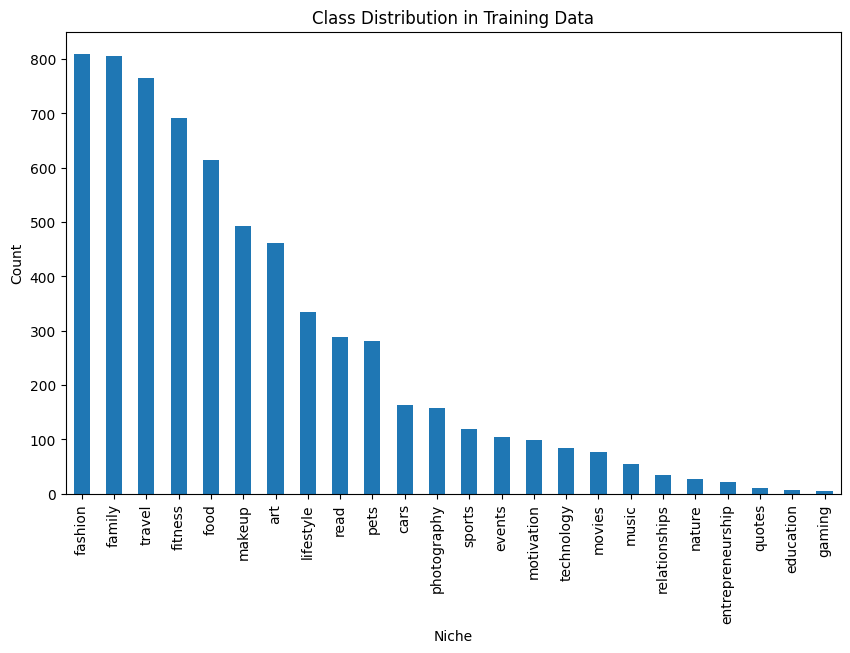

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_train is your target variable
plt.figure(figsize=(10, 6))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Data')
plt.xlabel('Niche')
plt.ylabel('Count')
plt.show()